# 🚢 Titanic Survival Prediction - Exploratory Data Analysis (EDA)

## Introduction
The Titanic dataset contains information about passengers, including demographics, ticket class, and survival status.  
Our goal is to explore the dataset, find patterns, and extract insights into survival factors.

## Objectives:
- Handle missing values effectively
- Perform univariate and bivariate analysis
- Visualize key survival trends
- Identify correlations between features


### Importing Libraries

In [726]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [728]:
titanic_df = pd.read_csv("./Titanic Data.csv")

In [730]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [732]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [734]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [736]:
len(titanic_df)

891

In [737]:
#Check for duplicate rows
titanic_df.duplicated().sum()

0

In [738]:
#Check for missing values
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Finding Missing Percentage

In [743]:
titanic_df["Age"].isna().sum()

177

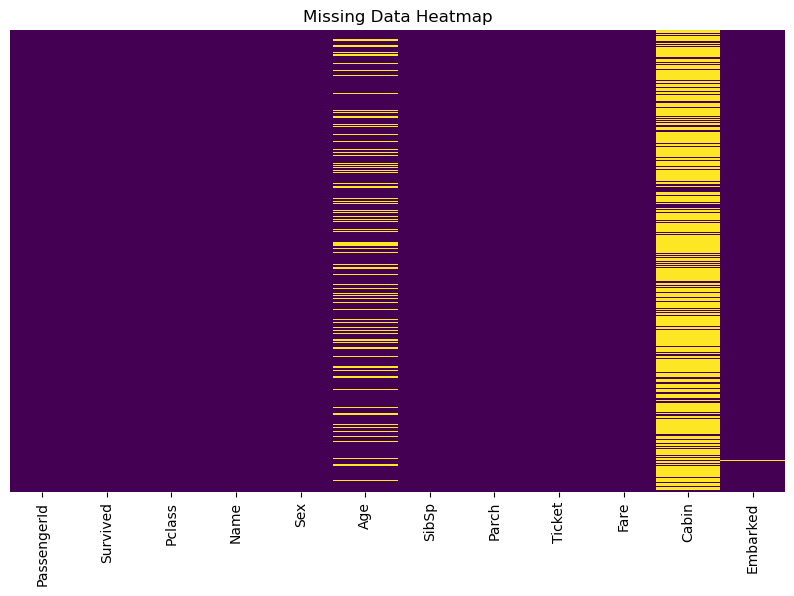

In [744]:
plt.figure(figsize=(10,6)) 

sns.heatmap(titanic_df.isnull(), cmap='viridis', cbar=False, yticklabels=False) 

plt.title("Missing Data Heatmap") 

plt.show() 

#### The Figure shows that it is completely missing at random.

In [747]:
missing_percentage = titanic_df.isnull().mean() * 100
missing_percentage

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [749]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Since more than 75% data is missing in Cabin, we can delete that column

In [753]:
titanic_df = titanic_df.drop(columns="Cabin", axis = 1)

In [754]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### Embarked is categorical and only 2 data missing. So fill with mode

In [758]:
from sklearn.impute import SimpleImputer
mode_imputer = SimpleImputer(strategy='most_frequent') 

titanic_df['Embarked'] = mode_imputer.fit_transform(titanic_df[['Embarked']]).ravel()

#fit_transform() returns a 2D NumPy array (shape: (n_samples, 1)) Therefore, have used ravel()


#titanic_df["Embarked"].fillna(titanic_df["Embarked"].mode()[0], inplace= True)
#mode() returns a Series, so [0] is used to access the first element (which is the most frequent value) of that Series.

In [760]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [762]:
titanic_df["Embarked"].mode()

0    S
Name: Embarked, dtype: object

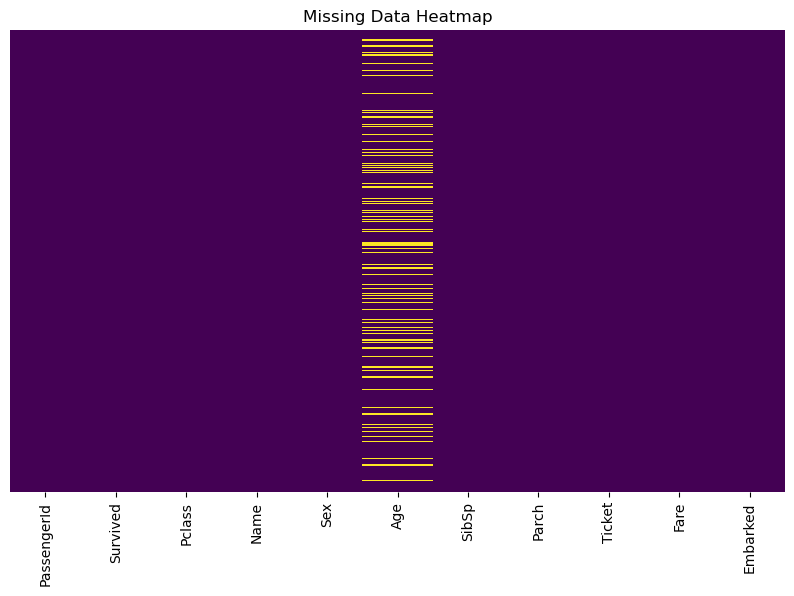

In [764]:
plt.figure(figsize=(10,6))
sns.heatmap(titanic_df.isna(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()


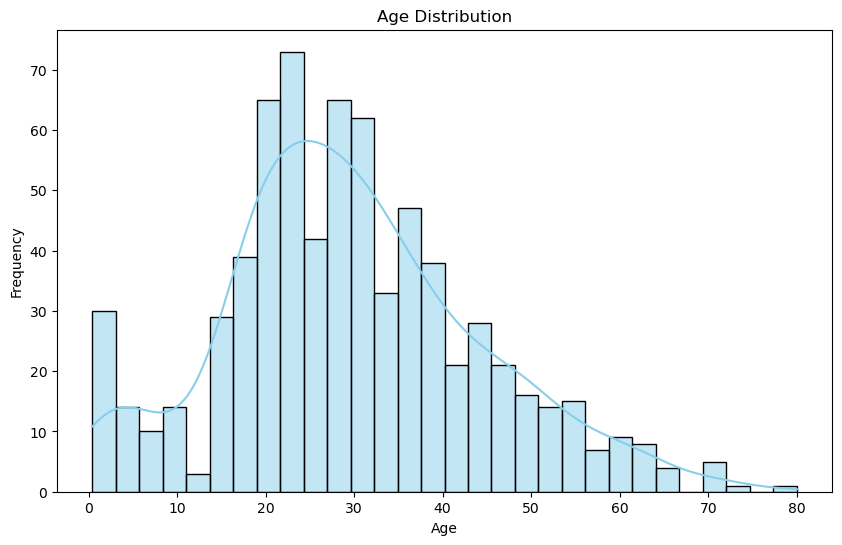

In [765]:
plt.figure(figsize=(10,6))
sns.histplot(titanic_df['Age'],kde=True, bins=30, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [767]:
age_skewness = titanic_df['Age'].skew()
print(f"Skewness of Age: {age_skewness}")

Skewness of Age: 0.38910778230082704


###### Skewness = 0: The data is perfectly symmetric (normal distribution).
###### -0.5 < Skewness < 0.5: The data is approximately symmetric or slightly skewed (considered normal for most purposes).
###### -1 < Skewness < -0.5: Moderately left-skewed (longer left tail).
###### 0.5 < Skewness < 1: Moderately right-skewed (longer right tail).
###### Skewness > 1: Highly right-skewed (very long right tail).
###### Skewness < -1: Highly left-skewed (very long left tail).

##### Therefore, we can fill Age with mean
#### Imputer technique is Useful in ML pipelines because it can be applied to future datasets consistently.

In [771]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
titanic_df["Age"] = mean_imputer.fit_transform(titanic_df[["Age"]])

#Another way->  titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace=True)

In [773]:
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Name and Passenger ID are identifiers. They don't add any value to our prediction purpose. We can Drop them. But before that It's better to extract title from name

In [777]:
titanic_df['Title'] = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\HP\AppData\Local\Temp\ipykernel_20788\4014338402.py:1: SyntaxWarning: invalid escape sequence '\.'
  titanic_df['Title'] = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [778]:
titanic_df.drop(columns=['Name', 'PassengerId','Ticket'], inplace=True)

In [779]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [783]:
titanic_df["Title"].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

## Perform Univariate Analysis

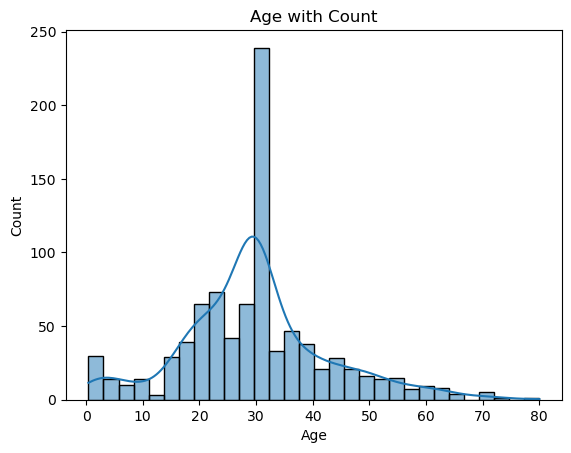

In [786]:
sns.histplot(titanic_df['Age'], kde=True)
plt.title("Age with Count")
plt.show()

In [787]:
titanic_df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [788]:
titanic_df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_20788\2298106321.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=titanic_df, palette='Set2')


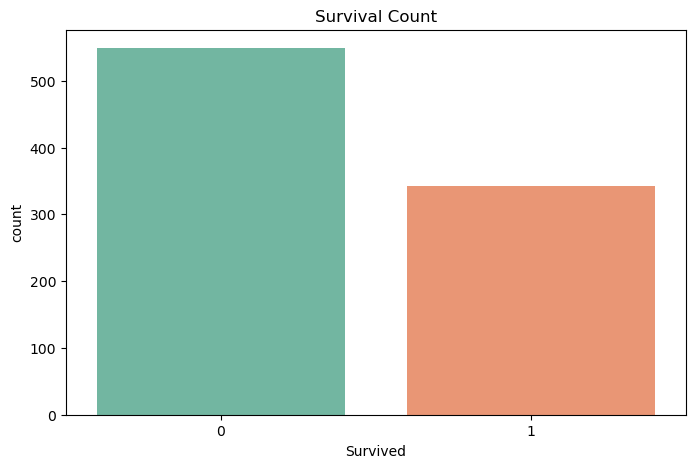

In [789]:
# Countplot for categorical variables
plt.figure(figsize=(8,5))
sns.countplot(x='Survived', data=titanic_df, palette='Set2')
plt.title('Survival Count')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20788\2857541374.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=titanic_df, palette='Set2')


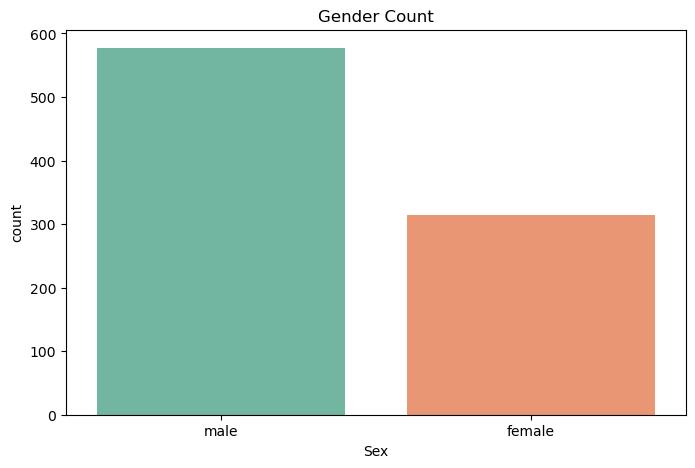

In [791]:
# Countplot for categorical variables
plt.figure(figsize=(8,5))
sns.countplot(x='Sex', data=titanic_df, palette='Set2')
plt.title('Gender Count')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20788\3658013909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pclass", data=titanic_df,palette="Set2")


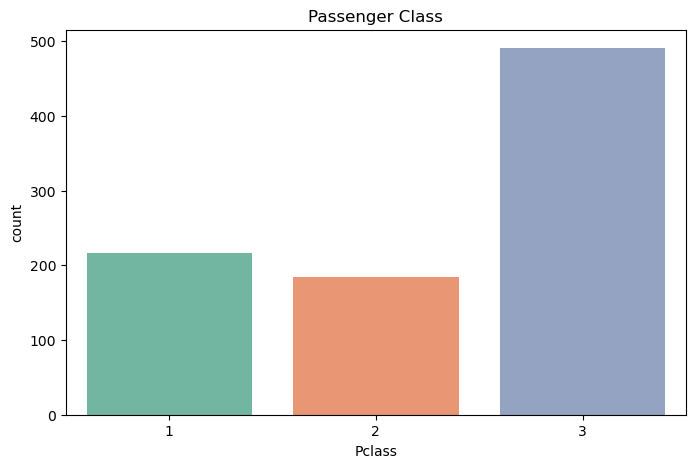

In [794]:
plt.figure(figsize=(8,5))
sns.countplot(x="Pclass", data=titanic_df,palette="Set2")
plt.title("Passenger Class")
plt.show()

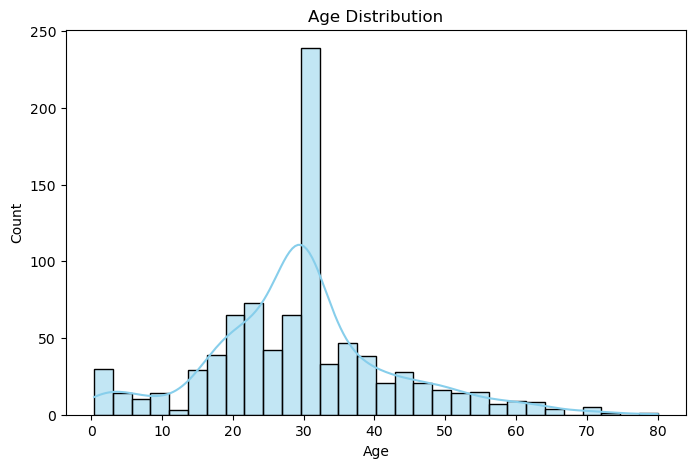

In [795]:
plt.figure(figsize=(8,5))
sns.histplot(titanic_df['Age'], kde=True, bins=30, color='skyblue')
plt.title("Age Distribution")
plt.show()

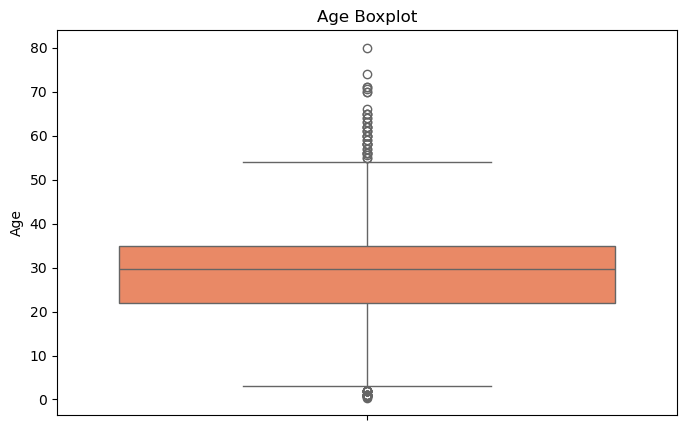

In [797]:
plt.figure(figsize=(8,5))
sns.boxplot(y=titanic_df['Age'], color='coral')
plt.title("Age Boxplot")
plt.show()


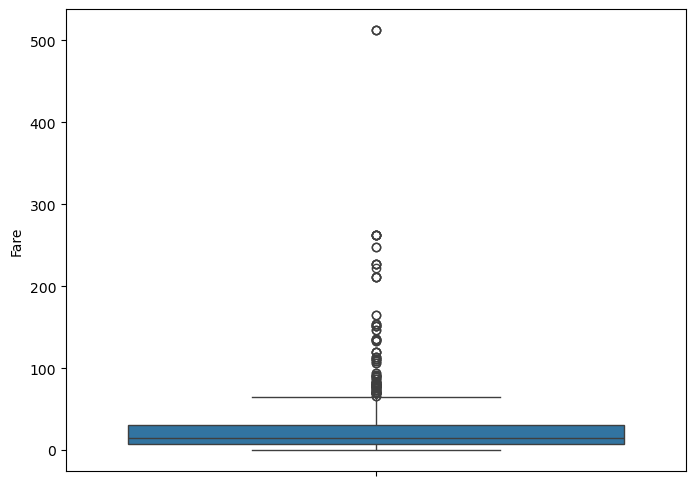

In [798]:
plt.figure(figsize=(8,6))
sns.boxplot(y="Fare", data = titanic_df)
plt.show()

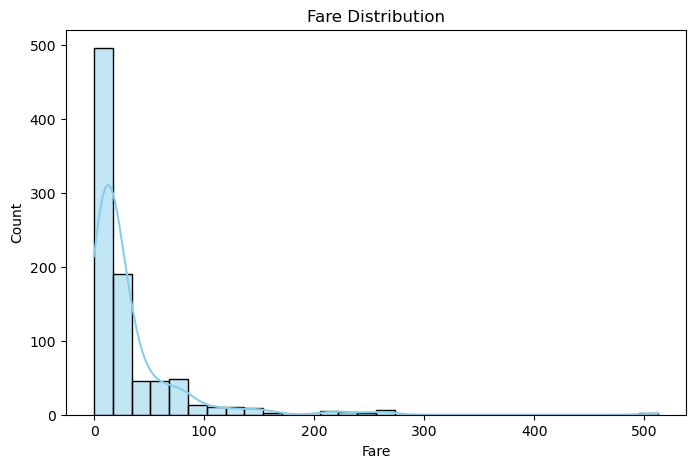

In [800]:
plt.figure(figsize=(8,5))
sns.histplot(titanic_df['Fare'], kde=True, bins=30, color='skyblue')
plt.title("Fare Distribution")
plt.show()

In [801]:
titanic_df["Fare"].min()

0.0

## BiVariate Analysis

#### Survival Rate By Gender

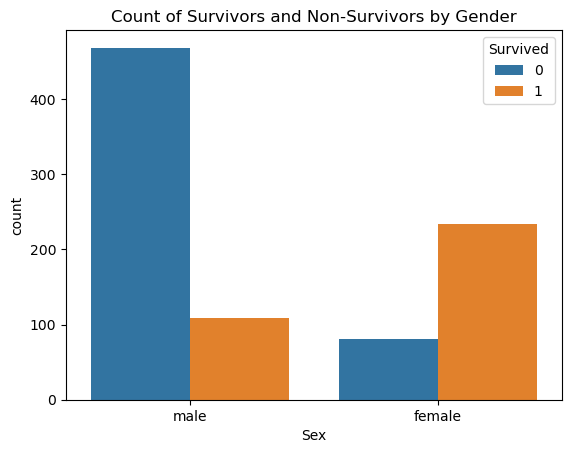

In [807]:
sns.countplot(x="Sex", hue="Survived", data=titanic_df)
plt.title("Count of Survivors and Non-Survivors by Gender")
plt.show()

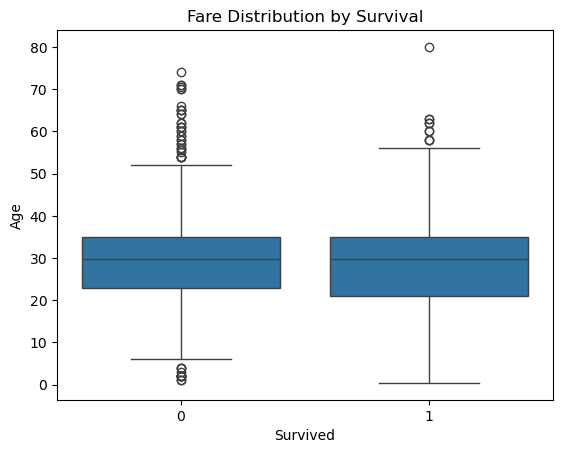

In [840]:
sns.boxplot(x="Survived", y="Age", data=titanic_df)
plt.title("Fare Distribution by Survival")
plt.show()

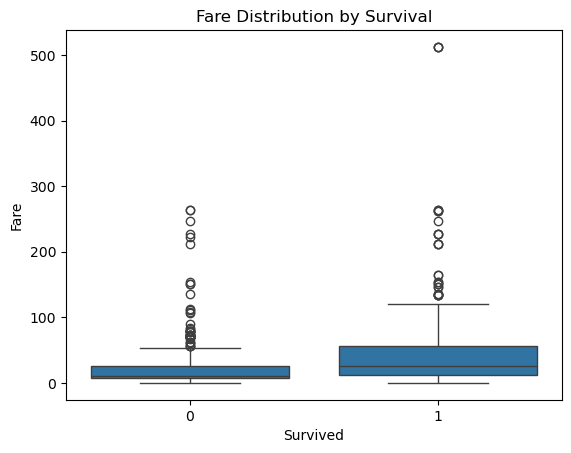

In [832]:
sns.boxplot(x="Survived", y="Fare", data=titanic_df)
plt.title("Fare Distribution by Survival")
plt.show()

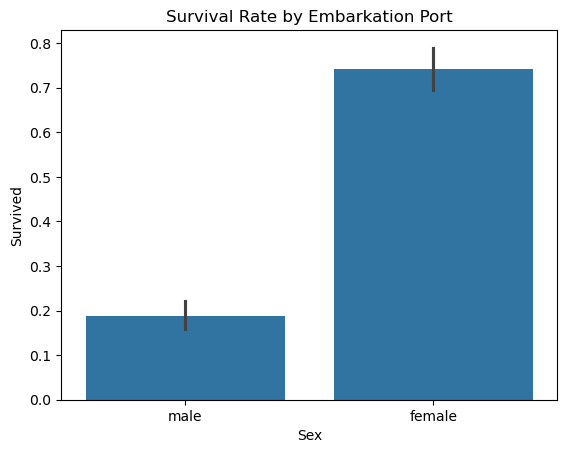

In [838]:
sns.barplot(x="Sex", y="Survived", data=titanic_df)
plt.title("Survival Rate by Gender")
plt.show()

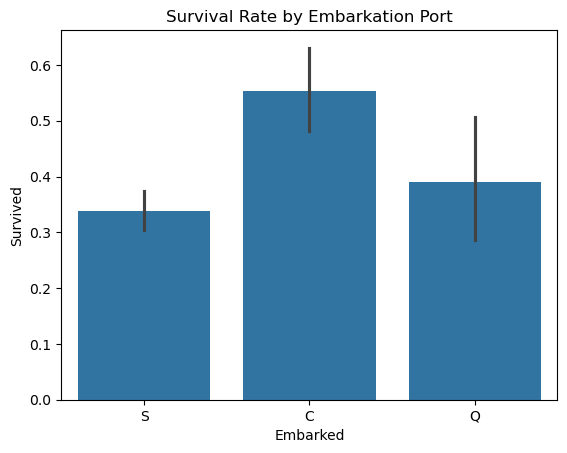

In [834]:
sns.barplot(x="Embarked", y="Survived", data=titanic_df)
plt.title("Survival Rate by Embarkation Port")
plt.show()

In [809]:
#sns.violinplot(x="Sex", y="Survived", data=titanic_df, inner="stick", bw=0.2)
#plt.title("Survival Distribution by Gender")
#plt.show()

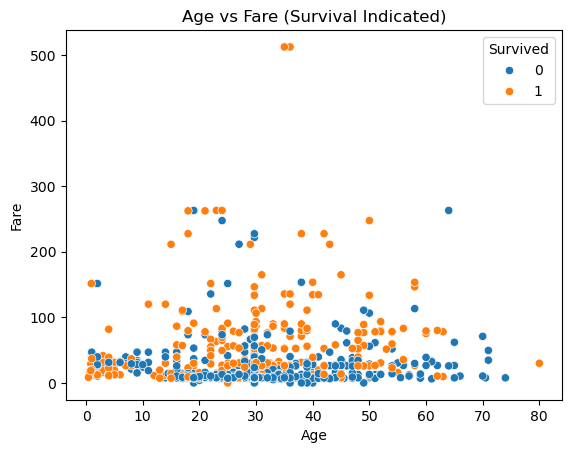

In [811]:
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=titanic_df)
plt.title("Age vs Fare (Survival Indicated)")
plt.show()

In [812]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [813]:
titanic_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Title        object
dtype: object

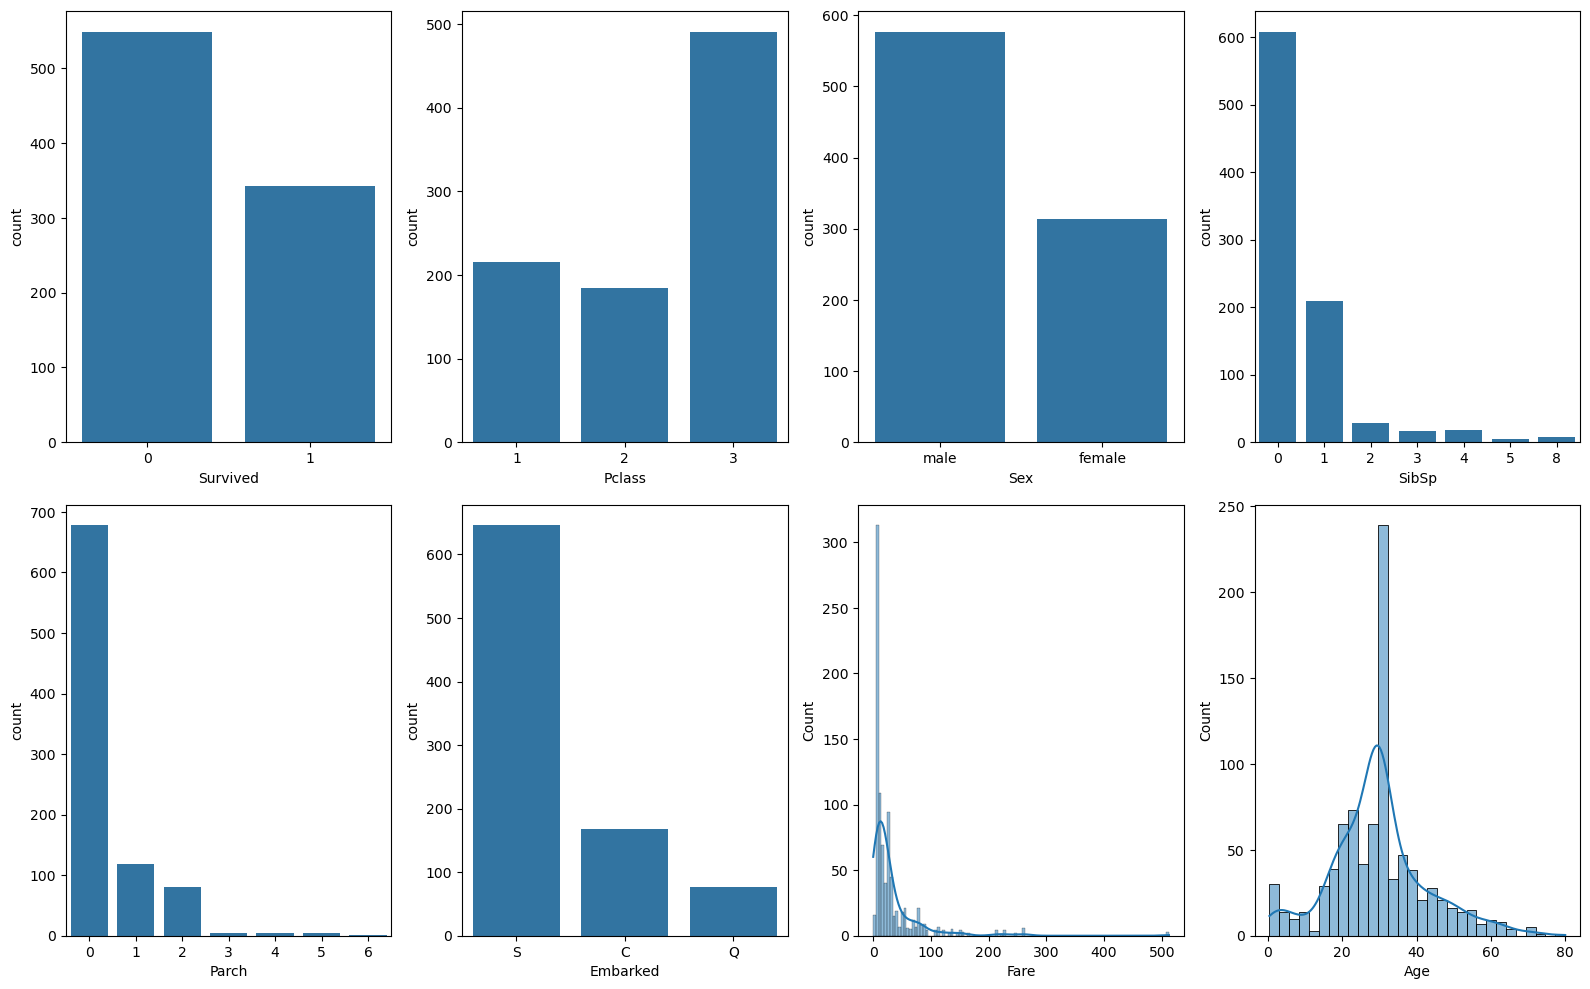

In [814]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))

# Categorical variables
sns.countplot(x='Survived', data=titanic_df, ax=axes[0,0])
sns.countplot(x='Pclass', data=titanic_df, ax=axes[0,1])
sns.countplot(x='Sex', data=titanic_df, ax=axes[0,2])
sns.countplot(x='SibSp', data=titanic_df, ax=axes[0,3])
sns.countplot(x='Parch', data=titanic_df, ax=axes[1,0])
sns.countplot(x='Embarked', data=titanic_df, ax=axes[1,1])

# Numerical variables (use histplot instead of distplot)
sns.histplot(titanic_df['Fare'], kde=True, ax=axes[1,2])
sns.histplot(titanic_df['Age'].dropna(), kde=True, ax=axes[1,3])

plt.tight_layout()
plt.show()


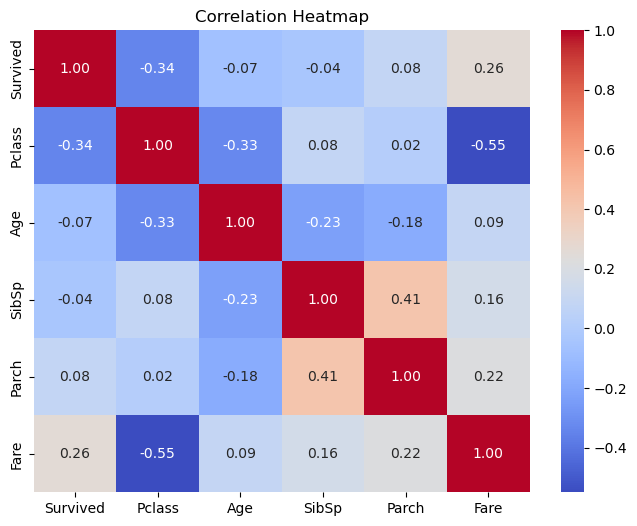

In [817]:
# Select only numeric columns
numeric_df = titanic_df.select_dtypes(include=["number"])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()